In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

sns.set_style("darkgrid")

In [2]:
titanic = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
cols = list(titanic.columns)
cols_lower = [x.lower() for x in cols]

titanic.columns = cols_lower

In [7]:
titanic.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [8]:
titanic.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:xlabel='survived', ylabel='count'>

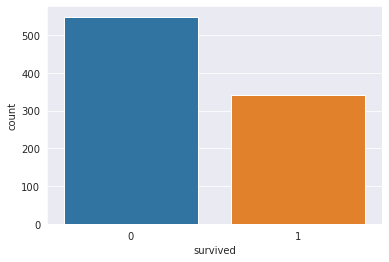

In [9]:
sns.countplot(x="survived", data=titanic)

In [10]:
titanic.corr()

,passengerid,survived,pclass,age,sibsp,parch,fare
passengerid,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
sibsp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

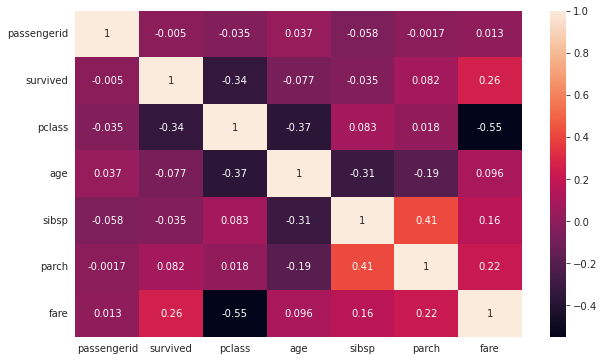

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(titanic.corr(), annot=True)

# Verificando e tranando dados nulos

In [12]:
df_cols = titanic.isnull().sum().reset_index().rename({"index":"columns", 0: "qt_nulls"}, axis=1)
df_null_cols = df_cols[df_cols["qt_nulls"] > 0]
null_cols =list(df_cols[df_cols["qt_nulls"] > 0] ["columns"])

In [13]:
df_cols[df_cols["qt_nulls"] > 0] ["qt_nulls"]/ len(titanic)

5     0.198653
10    0.771044
11    0.002245
Name: qt_nulls, dtype: float64

In [14]:
df_null_cols["perc_qt_nulls"] = df_null_cols["qt_nulls"]/len(titanic)

/tmp/ipykernel_3955/1146961287.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_null_cols["perc_qt_nulls"] = df_null_cols["qt_nulls"]/len(titanic)


In [15]:
df_null_cols

,columns,qt_nulls,perc_qt_nulls
5,age,177,0.198653
10,cabin,687,0.771044
11,embarked,2,0.002245


In [16]:
null_cols

['age', 'cabin', 'embarked']

In [17]:
titanic["age"] = titanic["age"].fillna(titanic["age"].median())
titanic["cabin"] = titanic["cabin"].fillna(titanic["cabin"].mode()[0])

Text(0.5, 1.0, 'map os null values')

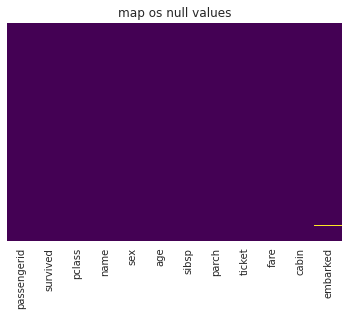

In [18]:
sns.heatmap(titanic.isnull(), cbar=False, cmap="viridis", yticklabels=False)
plt.title("map os null values")

In [19]:
titanic.dropna(inplace = True)

Text(0.5, 1.0, 'map of null values')

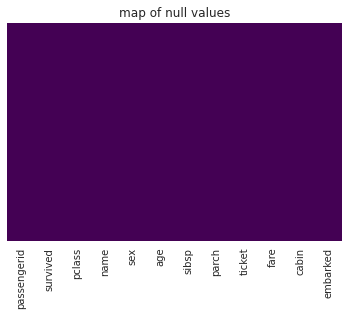

In [20]:
sns.heatmap(titanic.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("map of null values")

In [21]:
titanic.drop(["passengerid", "name"], axis=1, inplace=True)

# Tratando dados Categóricos

In [22]:
titanic.dtypes

survived      int64
pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
ticket       object
fare        float64
cabin        object
embarked     object
dtype: object

In [23]:
cols_types=titanic.dtypes.reset_index().rename({"index":"columns", 0:"type"}, axis=1)
cat_cols = list(cols_types[cols_types["type"] == "object"]["columns"])

In [24]:
cat_cols

['sex', 'ticket', 'cabin', 'embarked']

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()    

In [26]:
for col in cat_cols:
    titanic[col + "_encoded"] = le.fit_transform(titanic[col])
    titanic.drop(col, axis=1, inplace=True)

In [27]:
titanic.head()

,survived,pclass,age,sibsp,parch,fare,sex_encoded,ticket_encoded,cabin_encoded,embarked_encoded
0,0,3,22.0,1,0,7.2500,1,522,46,2
1,1,1,38.0,1,0,71.2833,0,595,80,0
2,1,3,26.0,0,0,7.9250,0,668,46,2
3,1,1,35.0,1,0,53.1000,0,48,54,2
4,0,3,35.0,0,0,8.0500,1,471,46,2


In [28]:
titanic.shape

(889, 10)

# verificando autlires

<AxesSubplot:>

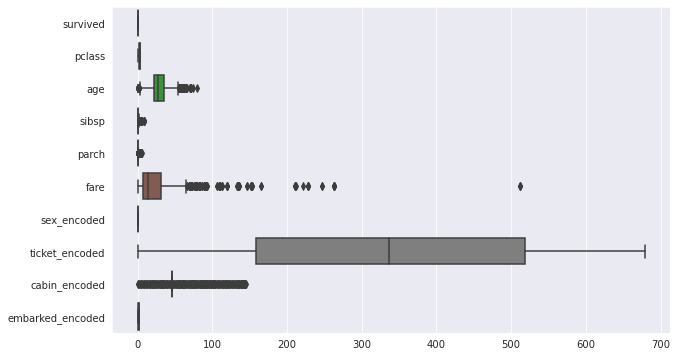

In [29]:
plt.figure(figsize=(10,6))
sns.boxplot(data=titanic,orient='h')

In [30]:
Q1 = titanic["fare"].quantile(.25)
Q3 = titanic["fare"].quantile(.75)
QI = Q3 - Q1

LI = Q1 - 1.5 * QI
LS = Q3 + 1.5 * QI

In [31]:
print(f"limite inferior: {LI}\nLimite superior: {LS}")

limite inferior: -26.7605
Limite superior: 65.6563


In [32]:
titanic["fare"].describe()

count    889.000000
mean      32.096681
std       49.697504
min        0.000000
25%        7.895800
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

<AxesSubplot:xlabel='fare'>

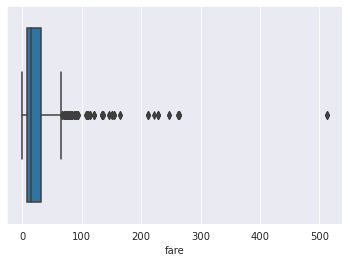

In [33]:
sns.boxplot(x="fare", data=titanic)

In [34]:
titanic["fare"].median()

14.4542

In [35]:
titanic.head()

,survived,pclass,age,sibsp,parch,fare,sex_encoded,ticket_encoded,cabin_encoded,embarked_encoded
0,0,3,22.0,1,0,7.2500,1,522,46,2
1,1,1,38.0,1,0,71.2833,0,595,80,0
2,1,3,26.0,0,0,7.9250,0,668,46,2
3,1,1,35.0,1,0,53.1000,0,48,54,2
4,0,3,35.0,0,0,8.0500,1,471,46,2


# Separando os dados em treino e teste

In [36]:
from sklearn.model_selection import train_test_split

x = titanic.drop("survived", axis=1)
y = titanic["survived"]

x_train, x_test, y_train ,y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Padronizando os dados

In [37]:
from  sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

# Preparando os modelo

In [38]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=0)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# Analizando a performance do modelo

###  acuracia

In [39]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8164794007490637

### matriz de confusão

In [40]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[146,  21],
       [ 28,  72]])

<AxesSubplot:>

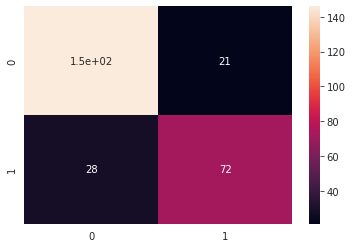

In [41]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

### precisão, recall e f1_score

In [42]:
from sklearn.metrics import precision_score, recall_score, f1_score

print(precision_score(y_test, y_pred)) # classificação positiva
print(recall_score(y_test, y_pred)) # classificação negativa
print(f1_score(y_test, y_pred)) # conjugado entre classificação positiva e negativa

0.7741935483870968
0.72
0.7461139896373057
